In [1]:
%pip list

Package                                  Version
---------------------------------------- --------------
absl-py                                  2.1.0
aiofiles                                 22.1.0
aiohttp                                  3.9.5
aiohttp-cors                             0.7.0
aiosignal                                1.3.1
aiosqlite                                0.20.0
ansicolors                               1.1.8
anyio                                    4.4.0
appdirs                                  1.4.4
argon2-cffi                              23.1.0
argon2-cffi-bindings                     21.2.0
arrow                                    1.3.0
asttokens                                2.4.1
async-timeout                            4.0.3
atpublic                                 4.1.0
attrs                                    23.2.0
Babel                                    2.15.0
backports.tarfile                        1.2.0
beatrix-jupyterlab                       20

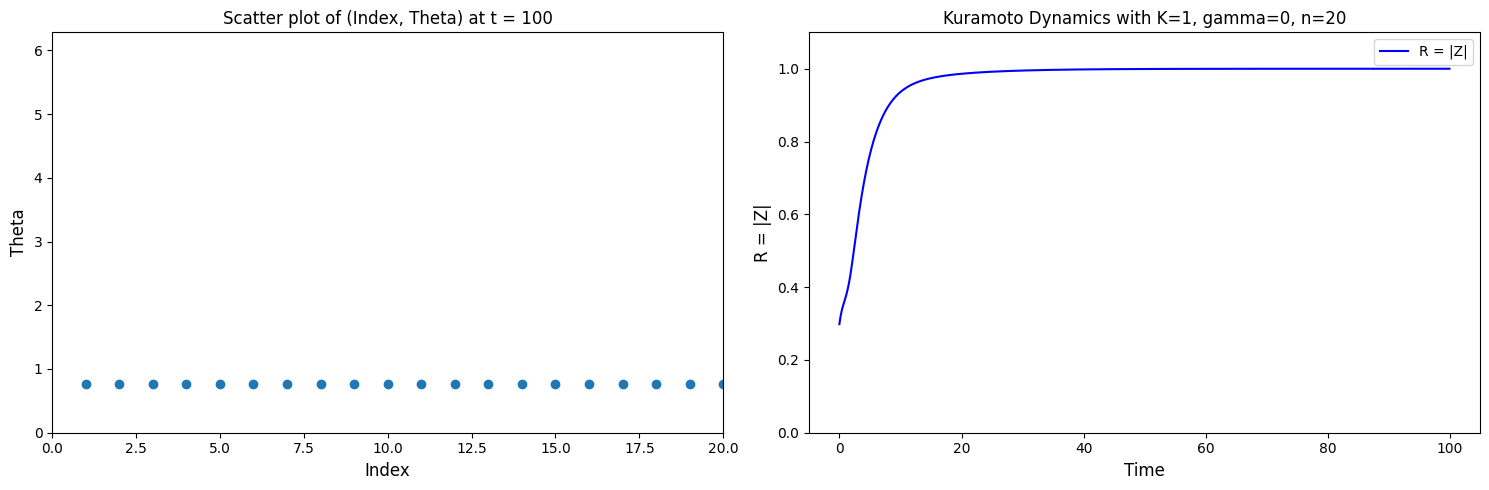

1.0494345756660697e-05
1.9236689465659165e-11
1.051719788315738e-05
1.9481739045721968e-11
0.999994747084074


In [2]:
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from utils import *

# Initial setups
dt, T, n, p = 0.1, 100, 20, 1
K, mu, gamma = 1, 0, 0  
#omega_dist = 'uniform_deterministic'
omega_dist = 'gaussian_random'
omega = make_omega(mu, gamma,n, omega_dist=omega_dist)
z0 = np.random.uniform(0,2*np.pi,n)
(t,NT) = (0,int(T/dt))
args = (K,omega)
A=nx.circulant_graph(n,list(range(1, p + 1)))

# Simulation loop
z = z0
Zs = []
ts = []
for t in range(NT):
    Z = find_sync_order_parameter(z)
    Zs.append(Z)
    z = rk4_network(dt, z, A, rhs_kuramoto_network, args)
    ts.append(t * dt)
              
# Data extraction
R = [np.abs(Z) for Z in Zs]
theta_final = np.mod(z, 2*np.pi)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Scatter plot of (index, theta) at t = NT
indices = np.arange(n)
ax[0].scatter(indices+1, theta_final)
ax[0].set_xlim([0, n])
ax[0].set_ylim([0, 2*np.pi])
ax[0].set_xlabel('Index', fontsize=12)
ax[0].set_ylabel('Theta', fontsize=12)
ax[0].set_title(f"Scatter plot of (Index, Theta) at t = {T}")

# Right plot: Dynamics of R over time
ax[1].plot(ts, R, label="R = |Z|", color="blue")
ax[1].set_xlabel('Time', fontsize=12)
ax[1].set_ylabel('R = |Z|', fontsize=12)
ax[1].set_title(f"Kuramoto Dynamics with K={K}, gamma={gamma}, n={n}")
ax[1].set_ylim([0, 1.1])
ax[1].legend()

plt.tight_layout()
plt.show()

cutoff = int(0.9*len(Zs))
Rfinal = np.mean(np.abs(Zs[cutoff:]))
Rfinal

a1=find_twist_order_parameter(z,1)
print(np.abs(a1))
a2=find_twist_order_parameter(z,2)
print(np.abs(a2))
a3=find_twist_order_parameter(z,-1)
print(np.abs(a3))
a4=find_twist_order_parameter(z,-2)
print(np.abs(a4))
a5=find_sync_order_parameter(z)
print(np.abs(a5))


In [3]:
import os
import time
from datetime import date

def simulate_sync_time(eps, R_final, dt, T, n, K, gamma, omega_dist, mu):
    # Initial setups
    omega = make_omega(mu, gamma, n, omega_dist=omega_dist)
    z0 = np.random.uniform(0, 2 * np.pi, n)
    (t, NT) = (0, int(T/dt))
    args = (K, omega)
    A=nx.circulant_graph(n,list(range(1, p + 1)))

    # Simulation loop
    z = z0
    for t in range(NT):
        Z = find_sync_order_parameter(z)
        R_current = np.abs(Z)
        Z1 = find_twist_order_parameter(z,1)
        R1_current = np.abs(Z1)
        Zm1 = find_twist_order_parameter(z,-1)
        Rm1_current = np.abs(Zm1)
        Z2 = find_twist_order_parameter(z,2)
        R2_current = np.abs(Z2)
        Zm2 = find_twist_order_parameter(z,-2)
        Rm2_current = np.abs(Zm2)
        Z3 = find_twist_order_parameter(z,3)
        R3_current = np.abs(Z3)
        Zm3 = find_twist_order_parameter(z,-3)
        Rm3_current = np.abs(Zm3)
        Z4 = find_twist_order_parameter(z,4)
        R4_current = np.abs(Z4)
        Zm4 = find_twist_order_parameter(z,-4)
        Rm4_current = np.abs(Zm4)
        
        # Check if R_current is within eps of R_final
        if abs(R_current - R_final) < eps:
            return [0, t * dt]  # Return the current time as T_sync(eps)
        # Check if R_current is within eps of R_final
        elif abs(R1_current - R_final) < eps:
            return [1, t * dt]  # Return the current time as T_sync(eps)
        # Check if R_current is within eps of R_final
        elif abs(Rm1_current - R_final) < eps:
            return [-1, t * dt]  # Return the current time as T_sync(eps)
        # Check if R_current is within eps of R_final
        elif abs(R2_current - R_final) < eps:
            return [2, t * dt]  # Return the current time as T_sync(eps)        
        # Check if R_current is within eps of R_final
        elif abs(Rm2_current - R_final) < eps:
            return [-2, t * dt]  # Return the current time as T_sync(eps)
        elif abs(R3_current - R_final) < eps:
            return [3, t * dt]  # Return the current time as T_sync(eps)        
        # Check if R_current is within eps of R_final
        elif abs(Rm3_current - R_final) < eps:
            return [-3, t * dt]  # Return the current time as T_sync(eps)
        elif abs(R4_current - R_final) < eps:
            return [4, t * dt]  # Return the current time as T_sync(eps)        
        # Check if R_current is within eps of R_final
        elif abs(Rm4_current - R_final) < eps:
            return [-4, t * dt]  # Return the current time as T_sync(eps)
        
        z = rk4_network(dt, z, A, rhs_kuramoto_network, args)
        
    return None  # Return None if the system did not synchronize within the given time T


# Pars
R_final = 1.0  # from above
N_trial = 10**2  # Or any other number of trials
eps = 0.01  # Or any other small value for epsilon
Tsync_values = []
Ttwist1_values = []
Ttwistm1_values = []
Ttwist2_values = []
Ttwistm2_values = []
Ttwist3_values = []
Ttwistm3_values = []
Ttwist4_values = []
Ttwistm4_values = []

# Make data
# For logging
start_time = time.time()
total_time_for_trials = 0
for trial in range(N_trial):
    trial_start_time = time.time()
    Tsync = simulate_sync_time(eps, R_final, dt, T, n, K, gamma, omega_dist, mu)
    trial_end_time = time.time()
    trial_duration = trial_end_time - trial_start_time
    total_time_for_trials += trial_duration
    average_time_per_trial = total_time_for_trials / (trial + 1)
    estimated_time_left = average_time_per_trial * (N_trial - trial - 1)
    if Tsync is not None and Tsync[0] == 0:
        Tsync_values.append(Tsync[1])
    elif Tsync is not None and Tsync[0] == 1:
        Ttwist1_values.append(Tsync[1])
    elif Tsync is not None and Tsync[0] == -1:
        Ttwistm1_values.append(Tsync[1])
    elif Tsync is not None and Tsync[0] == 2:
        Ttwist2_values.append(Tsync[1])
    elif Tsync is not None and Tsync[0] == -2:
        Ttwistm2_values.append(Tsync[1])
    elif Tsync is not None and Tsync[0] == 3:
        Ttwist3_values.append(Tsync[1])
    elif Tsync is not None and Tsync[0] == -3:
        Ttwistm3_values.append(Tsync[1])
    elif Tsync is not None and Tsync[0] == 4:
        Ttwist4_values.append(Tsync[1])
    elif Tsync is not None and Tsync[0] == -4:
        Ttwistm4_values.append(Tsync[1])
    
    # Logging
#    print(f"Trial {trial + 1}/{N_trial}")
#    print(f"Time for current run: {trial_duration:.2f} seconds")
#    print(f"Estimated time left: {estimated_time_left/60.0:.2f} min")
#    print(f"Total estimated time: {(estimated_time_left + total_time_for_trials)/60.0:.2f} min")
#    print("-------------------------")

end_time = time.time()
print(f"Total time taken: {end_time - start_time:.2f} seconds")


Total time taken: 61.88 seconds


In [4]:
# Save
dir_name = "data/"
os.makedirs(dir_name, exist_ok=True)
current_date = date.today().strftime('%Y-%m-%d')
fname = f"{dir_name}kuramoto-ring-identical/Tsync_q=0_p{p}_K{K}_gamma{gamma}_n{n}_eps{eps}_trial{N_trial}.npy"
os.makedirs(os.path.dirname(fname), exist_ok=True)
np.save(fname, Tsync_values)